In [ ]:
# Feature Selection with Univariate Statistical Tests
import pandas as pd
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('/content/pima-indians-diabetes.csv')
dataframe.head(5)



,A1,A2,A3,A4,A5,A6,A7,A8,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)

print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:4,:])                 #A1,A2,A6,A8

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]
[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]]


In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model,n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


In [ ]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# load data
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier(n_estimators=5)
model.fit(X, Y)
print(model.feature_importances_)
print(model.score(X,Y))

[0.117 0.238 0.092 0.084 0.065 0.133 0.126 0.145]
1.0


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X = array[:,0:8]
y = array[:,8]
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on all available data
pipeline.fit(X, y)
# make a prediction for one example
data = [[3.16075093,-4.35936352,-1.61271951,-1.39352057,-2.48924933,-1.93094078,3.26130366,2.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Accuracy: 0.701 (0.058)
Predicted Class: 0


dict_items([('2', Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=2)),
                ('m', DecisionTreeClassifier())])), ('3', Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=3)),
                ('m', DecisionTreeClassifier())])), ('4', Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=4)),
                ('m', DecisionTreeClassifier())])), ('5', Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=5)),
                ('m', DecisionTreeClassifier())])), ('6', Pipeline(steps=[('s',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=6)),
                ('m', DecisionTreeClassifier())])), ('7', Pipeline(steps=[('s',
                 RFE(estimator=DecisionT

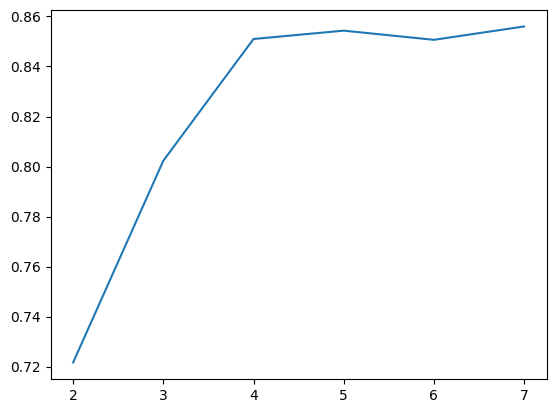

In [ ]:

# exploring hyperparameter the 'number of selected features' for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot



# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(2, 8):
   rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
   model = DecisionTreeClassifier()
   models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

# define dataset
models = get_models()
print(models.items())
# evaluate the models and store results
results, names = list(), list()
ml=list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 ml.append(mean(scores))
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
print(names)
print(ml)
pyplot.plot(names,ml)
#best parameter 7